In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [3]:
print('Доля аномалий в выборке: {:.2%}'.format(data.Class.sum()/data.shape[0]))

Доля аномалий в выборке: 0.17%


In [4]:
anomaly_threshold = data.Class.sum()/data.shape[0]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


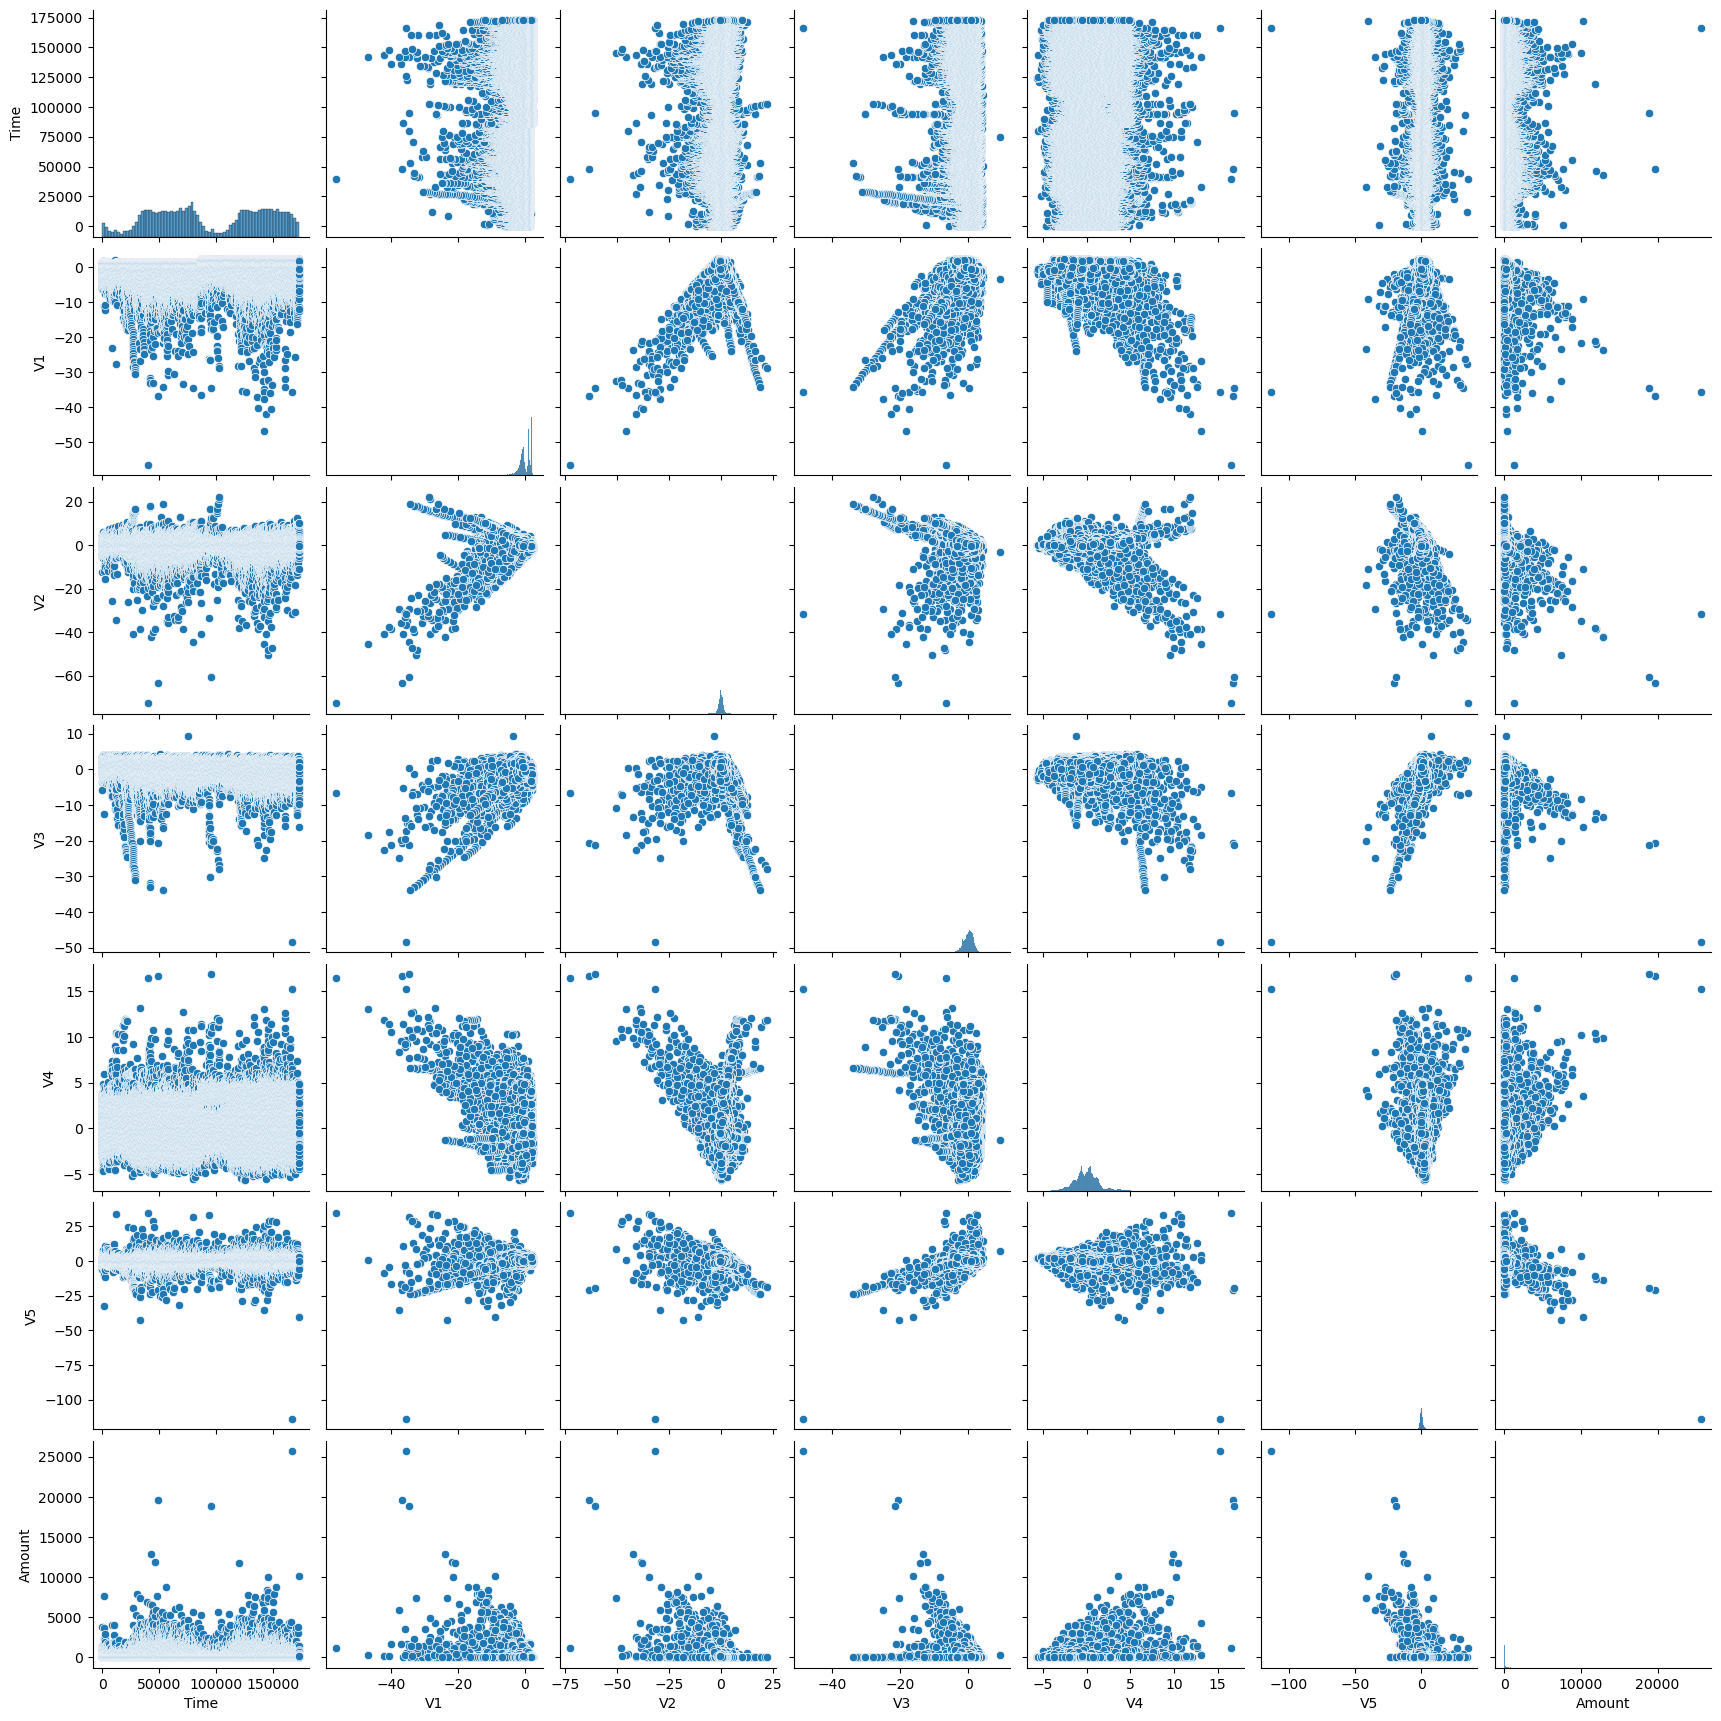

In [7]:
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
sns.pairplot(data=data, vars = selected_features);

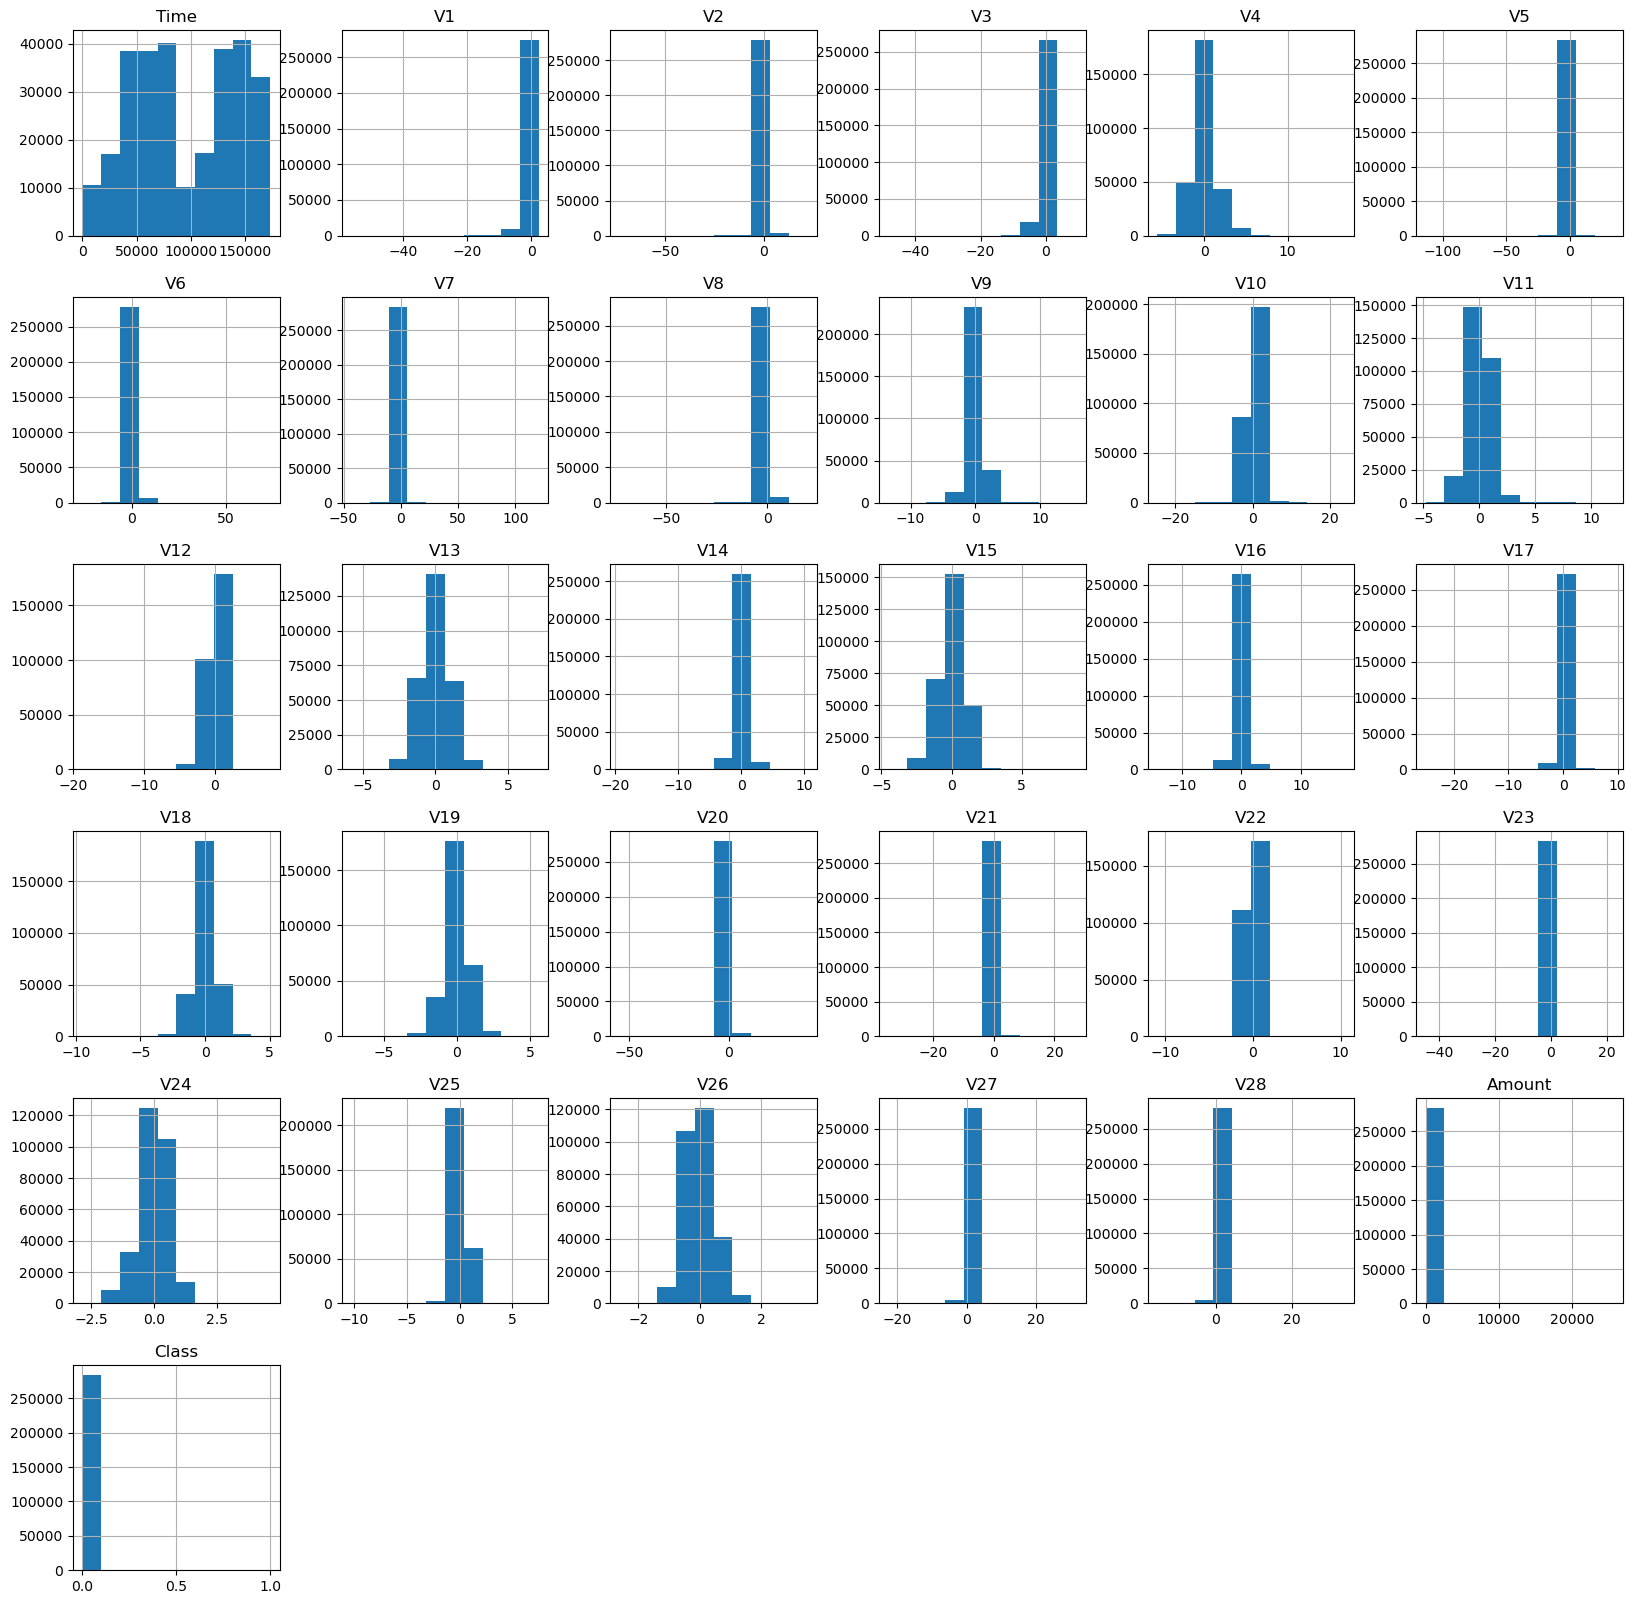

In [8]:
data.hist(figsize=(20, 20));

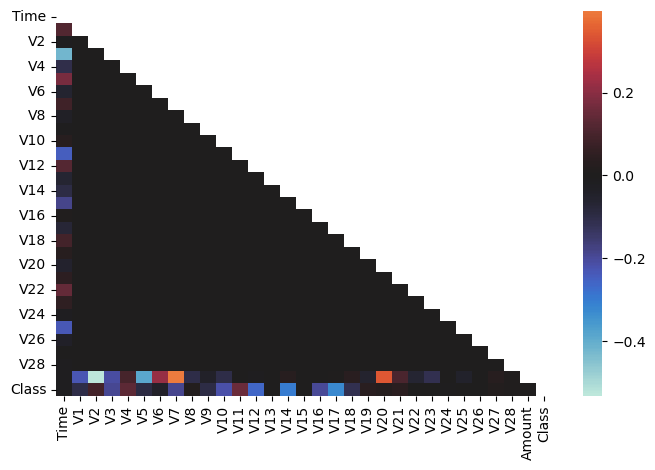

In [9]:
plt.figure(figsize=(8,5))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, center=0);

## 3 Сигмы

In [10]:
# выделим признаки из данных
data_features = data.iloc[:, :-1]
data_features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [11]:
# Нормализация значений признаков (необязательно, но желательно!)
from sklearn.preprocessing import MinMaxScaler
X_data = MinMaxScaler().fit_transform(data_features)
Y_data = data.iloc[:, -1]


In [12]:
up_bound = X_data.mean(axis=0) + 3 * X_data.std(axis=0)
low_bound = X_data.mean(axis=0) - 3 * X_data.std(axis=0)
sigma_outliers = np.where((X_data < low_bound) | (X_data > up_bound), 1, 0).any(axis=1).astype('int8')

In [13]:
print('Количество выбросов в выборке для 3 сигм: {}'.format(sigma_outliers.sum()))
print('Процент выбросов в выборке для 3 сигм: {:.2%}'.format(sigma_outliers.mean()))

Количество выбросов в выборке для 3 сигм: 37816
Процент выбросов в выборке для 3 сигм: 13.28%


## Межквартильное отклонение

In [14]:
threshold=1.5
data_anom =pd.DataFrame(columns = data_features.columns)
for col in data_features.columns:
  IQR = data_features[col].quantile(0.75) - data_features[col].quantile(0.25)
  up_bound = data_features[col].quantile(0.75) + (IQR * threshold)
  low_bound = data_features[col].quantile(0.25) - (IQR * threshold)
  data_anom[col] = pd.concat([data_features[col]>up_bound, data_features[col]<low_bound], axis=1).sum(axis=1)>=1

In [15]:
iqr_outliers = np.array([1 if label == True
                           else 0 for label in data_anom.sum(axis=1)>0])

In [16]:
print('Количество выбросов в выборке: {}'.format(sum(data_anom.sum(axis=1)>0)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(data_anom.sum(axis=1)>0)/len(data)))

Количество выбросов в выборке: 138473
Процент выбросов в выборке: 48.62%


## Кластеризация

### Distance-based (t-SNE)

In [17]:
scaled_data = pd.DataFrame(
    data=X_data,
    columns=data_features.columns
)

In [18]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
class DistanceOutliers(BaseEstimator):
    """
    Parameters:
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [22]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=100*(1-anomaly_threshold))
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)

In [23]:
print('Количество выбросов в выборке: {}'.format(sum(euclidian_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(euclidian_outliers)/len(data)))

Количество выбросов в выборке: 492
Процент выбросов в выборке: 0.17%


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.5
eps_history = [eps]
while outlier_percentage>anomaly_threshold:
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    print("eps={}, Процент выбросов в выборке: {:.2%}".format(eps, outlier_percentage))
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(scaled_data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

к сожалению, DBSCAN казался очень затратным по памяти, мой комп не потянул

## One-Class SVM

In [24]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=anomaly_threshold, gamma='auto') # nu - Верхняя граница доли ошибок обучения и нижняя граница доли опорных векторов.
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [25]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(svm_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(svm_outliers )/len(data)))

Количество выбросов в выборке: 492
Процент выбросов в выборке: 0.17%


## Isolation Forest

In [26]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=anomaly_threshold,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [27]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(isolation_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(isolation_outliers)/len(data)))

Количество выбросов в выборке: 492
Процент выбросов в выборке: 0.17%


# Оценка качества

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(Y_data, sigma_outliers))
print(confusion_matrix(Y_data, sigma_outliers))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      0.90      0.02       492

    accuracy                           0.87    284807
   macro avg       0.51      0.89      0.48    284807
weighted avg       1.00      0.87      0.93    284807

[[246943  37372]
 [    48    444]]


In [32]:
print(classification_report(Y_data, iqr_outliers))
print(confusion_matrix(Y_data, iqr_outliers))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68    284315
           1       0.00      0.97      0.01       492

    accuracy                           0.52    284807
   macro avg       0.50      0.74      0.34    284807
weighted avg       1.00      0.52      0.68    284807

[[146319 137996]
 [    15    477]]


In [33]:
print(classification_report(Y_data, euclidian_outliers))
print(confusion_matrix(Y_data, euclidian_outliers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.44      0.44      0.44       492

    accuracy                           1.00    284807
   macro avg       0.72      0.72      0.72    284807
weighted avg       1.00      1.00      1.00    284807

[[284041    274]
 [   274    218]]


In [34]:
print(classification_report(Y_data, svm_outliers))
print(confusion_matrix(Y_data, svm_outliers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.24      0.24       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807

[[283943    372]
 [   372    120]]


In [35]:
print(classification_report(Y_data, isolation_outliers))
print(confusion_matrix(Y_data, isolation_outliers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.25      0.25       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807

[[283947    368]
 [   368    124]]


Лучше всех себя показал Distance-based

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1) # количество главных компонент, количество ближайших соседей, -1 - оличество параллельных заданий для запуска поиска соседей
tsne_transformed = tsne.fit_transform(scaled_data)


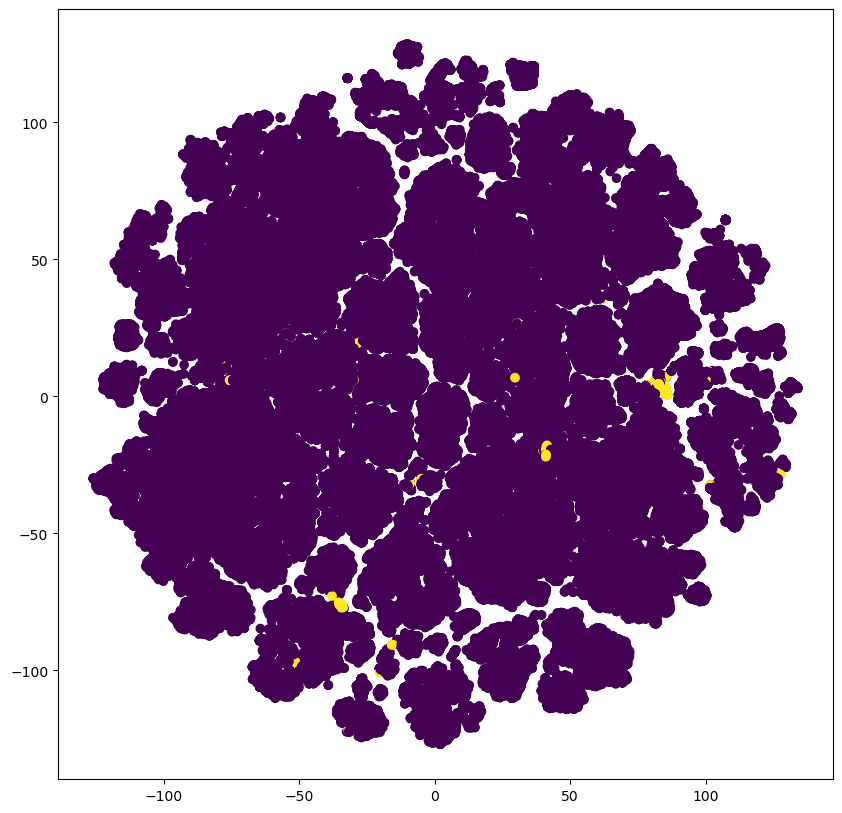

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

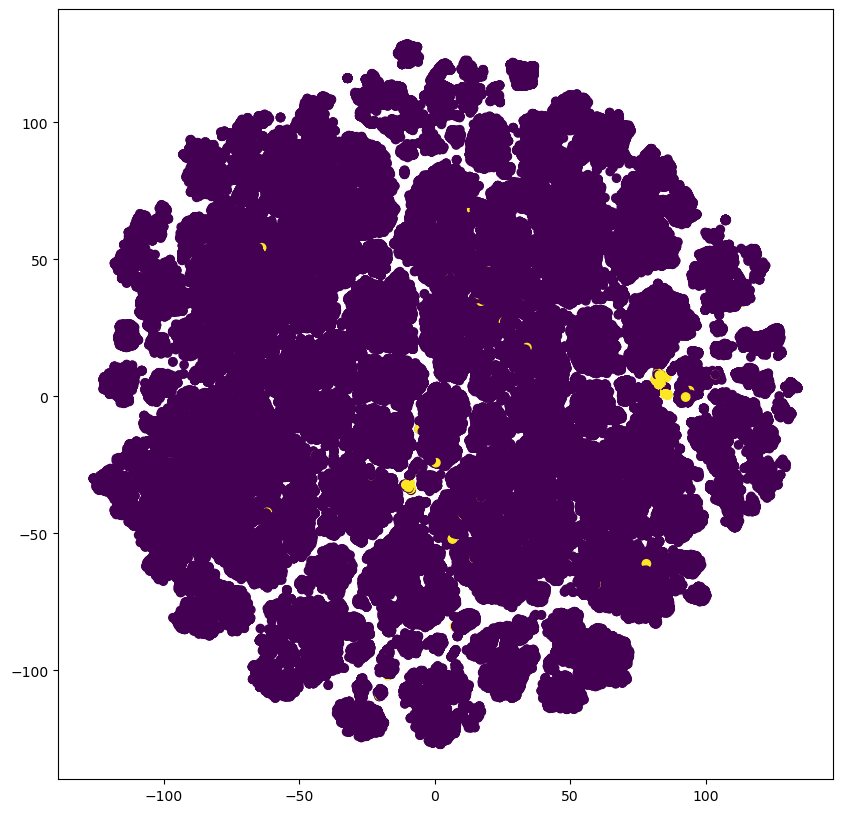

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=Y_data);

по графику нельзя сказать, что аномалии лежат далеко от основной массы точек